# 二叉树

## 1.二叉树实现

使用以下方法操作二叉树：<br>
1.CreateBinaryTree() 创建二叉树实力<br>
2.InsertLeftChild() 插入左子树<br>
3.InsertRightChild() 插入右子树<br>
4.GetLeftChild() 获取左子树<br>
5.GetRightChild() 获取右子树<br>
6.SetRootVal() 设置当前节点值<br>
7.GetRootVal() 获取当前节点值

### 1.1 列表之列表法

列表之列表法指用列表嵌套来表示树的结构。例如：\["root",\[  left \],\[  right \]]。列表的一个值表示节点值，第二个列表表示左子树，第三个值表示右子树。

In [1]:
def CreateBinaryTree(root):
    return [root,[],[]]

In [2]:
#插入新的左节点的时候要将原始左子树作为新节点的左子树
def InsertLeftChild(root, newNode):
    t = root.pop(1)
    root.insert(1,[newNode, t, []])

In [3]:
#与插入新的左节点类似
def InsertRightChild(root, newNode):
    t = root.pop(2)
    root.insert(2,[newNode, [], t])

In [4]:
def GetLeftChild(root):
    return root[1]

In [8]:
def GetRightChild(root):
    return root[2]

In [6]:
def GetVal(root):
    return root[0]

In [11]:
def SetVal(root,val):
    root[0]=val

In [13]:
#测试
BT = CreateBinaryTree(1)
print(BT)
InsertLeftChild(BT,2)
print(BT)
InsertRightChild(BT, 3)
print(BT)
print(GetLeftChild(BT))
print(GetRightChild(BT))
SetVal(BT,"root")
print(GetVal(BT))
node = GetRightChild(BT)
InsertLeftChild(node, 5)
print(BT)

[1, [], []]
[1, [2, [], []], []]
[1, [2, [], []], [3, [], []]]
[2, [], []]
[3, [], []]
root
['root', [2, [], []], [3, [5, [], []], []]]


### 1.2节点引用表示法

节点引用表示法指创建节点类，类的属性包括属性值、左右节点的引用

In [ ]:
class Node:
    def __init__(self, keyOb):
        self.key = keyOb
        self.left = None
        self.right = None

In [ ]:
def CreateBinaryTree(nodeVal):
    return Node(nodeVal)

In [ ]:
#插入新的左节点，记得将该节点的原始左节点作为新的左节点的左节点
def InsertLeftChild(root, val):
    leftNode = Node(val)
    leftNode.left = root.left
    root.left = leftNode

In [ ]:
#同插入左节点
def InsertRightChild(root, val):
    rightNode = Node(val)
    rightNode.right = root.right
    root.right = rightNode

In [ ]:
def GetLeftChild(root):
    return root.left

In [ ]:
def GetRightChild(root):
    return root.right

In [ ]:
def GetVal(root):
    return root.key

In [ ]:
def SetVal(root, val):
    root.key = val

### 1.3列表表示法

列表表示法是用数组存储节点值和数组下标表示节点关系来表示树结构。见heap文件。

## 2.二叉树的遍历（Preorder Traversal）

### 1.1 前序遍历

#### 递归法

In [15]:
def preTrav_rec(A, i):
    if i >= len(A):#递归终止条件：二叉树中没有该节点
        return
    if A[i] is not None:
        result.append(A[i])
    #前序遍历左子树
    preTrav_rec(A,2*i+1)
    #前序遍历右子树
    preTrav_rec(A,2*i+2)

In [16]:
#测试
A = [1,5,2,None,None,3]
#          1
#        /   \
#      5      2
#    /  \    /
#None  None 3
result = []
preTrav_rec(A,0)
print(result)

[1, 5, 2, 3]


#### 迭代法

In [17]:
def preTrav_iter(A, i):
    if i >=len(A):
        return []
    stack = [i]
    output = []
    while len(stack)>0:
        ind = stack.pop()
        if A[ind] is not None:
            output.append(A[ind])
        if ind*2+2 < len(A):
            stack.append(ind*2+2)
        if ind*2+1 < len(A):
            stack.append(ind*2+1)
    return output

In [18]:
#测试
A = [1,5,2,None,None,3]
#          1
#        /   \
#      5      2
#    /  \    /
#None  None 3
result = preTrav_iter(A,0)
print(result)

[1, 5, 2, 3]


In [19]:
def preTrav_iter_1(A, i):
    if i >=len(A):
        return []
    stack = []
    output = []
    curr = i
    while curr < len(A) or len(stack)>0:
        while curr<len(A):
            if A[curr] is not None:
                output.append(A[curr])
            stack.append(curr)
            curr = 2*curr+1
        curr = stack.pop()
        curr = curr*2+2
    return output

In [20]:
#测试
A = [1,5,2,None,None,3]
#          1
#        /   \
#      5      2
#    /  \    /
#None  None 3
result = preTrav_iter_1(A,0)
print(result)

[1, 5, 2, 3]


### 1.2中序遍历（Inorder Traversal）

 #### 递归法

In [32]:
def InorderTrav_rec(A,i):
    if i>=len(A):
        return
    #中序遍历左子树
    InorderTrav_rec(A,2*i+1)
    if A[i] is not None:
        result.append(A[i])
    #中序遍历右子树
    InorderTrav_rec(A,2*i+2)

In [33]:
#测试
A = [1,5,2,None,None,3]
#          1
#        /   \
#      5      2
#    /  \    /
#None  None 3
result = []
InorderTrav_rec(A,0)
print(result)

[5, 1, 3, 2]


#### 迭代法

In [34]:
def InorderTrav_iter(A, i):
    if i >=len(A):
        return []
    stack = []
    output = []
    curr = i
    while curr < len(A) or len(stack)>0:
        while curr<len(A):
            stack.append(curr)
            curr = 2*curr+1
        curr = stack.pop()
        if A[curr] is not None:
            output.append(A[curr])
        curr = curr*2+2
    return output

In [35]:
#测试
A = [1,5,2,None,None,3]
#          1
#        /   \
#      5      2
#    /  \    /
#None  None 3
result = InorderTrav_iter(A,0)
print(result)

[5, 1, 3, 2]


### 1.3后序遍历（Postorder Traversal）

#### 递归法

In [36]:
def PostorderTrav_rec(A,i):
    if i >=len(A):
        return 
    PostorderTrav_rec(A,2*i+1)
    PostorderTrav_rec(A,2*i+2)
    if A[i] is not None:
        result.append(A[i])

In [37]:
#测试
A = [1,5,2,None,None,3]
#          1
#        /   \
#      5      2
#    /  \    /
#None  None 3
result = []
PostorderTrav_rec(A,0)
print(result)

[5, 3, 2, 1]


#### 迭代法

In [40]:
def PostorderTrav_iter(A,i):
    if i>=len(A):
        return 
    stack = []
    output = []
    curr = i
    while curr < len(A) or len(stack)>0:
        while curr<len(A):
            if A[curr] is not None:
                output.append(A[curr])
            stack.append(curr)
            curr = 2*curr+2
        curr = stack.pop()
        curr = 2*curr+1
    return reversed(output)
    

In [43]:
#测试
A = [1,5,2,None,None,3]
#          1
#        /   \
#    None     2
#   /   \    /
#None  None 3
result = PostorderTrav_iter(A,0)
print(list(result))

[5, 3, 2, 1]


前序遍历、中序遍历、后续遍历的递归写法的模版清楚了吗？

### 1.4层次遍历

In [45]:
import queue
def layerTrav(A, i):
    length = len(A)
    if i >= length:
        return
    q = queue.Queue()
    q.put(i)
    output = []
    while not q.empty():
        ind = q.get()
        if ind*2+1<length:
            q.put(ind*2+1)
        if ind*2+2<length:
            q.put(ind*2+2)
        if A[ind] is not None:
            output.append(A[ind])
    return output

In [47]:
#测试
A = [1,5,2,None,None,3]
#          1
#        /   \
#       5     2
#    /    \  /
# None None 3
result = layerTrav(A,0)
print(result)

[1, 5, 2, 3]


## 3.二叉树的应用

In [2]:
from IPython.display import Image

### 3.1解析树

我们可以将((7 + 3) * (5 - 2)) 这样的数学表达式表示成解析树

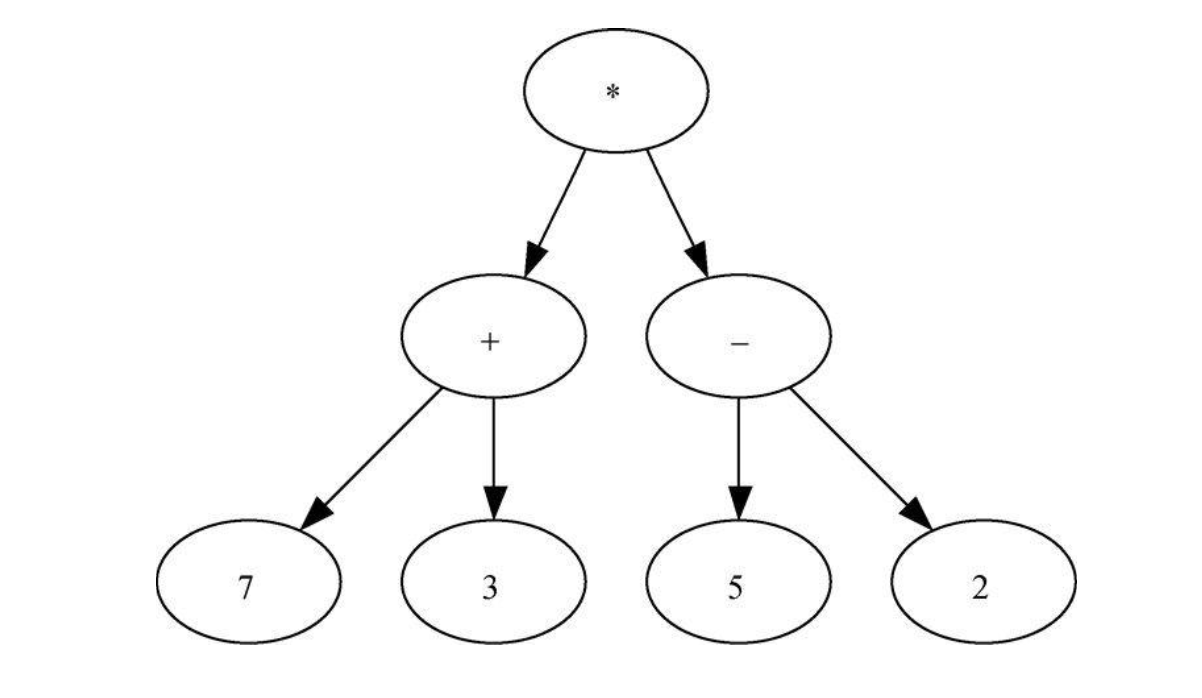

In [6]:
Image(filename = '../images/paraseTree.png', width=500, height=300)

本节我们将讨论三个问题：<br>
(1)如何根据完全括号表达式构建解析树；<br>
(2)如何计算解析树中的表达式<br>
(3)如何将解析树还原成最初的数学表达式

## 3.2根据括号表达式构建解析树

规则：<br>
(1)如果读取到"("，为当前节点添加左节点，将当前节点修改为左节点<br>
(2)如果读取到")"，修改当前节点为父节点<br>
(3)如果读取到数字，将当前节点的值设置为该数值,修改当前节点为父节点。<br>
(4)如果读取到运算符，为当前节点添加右节点，将当前节点设置为右节点

根据上面规则我们实现3.1节的例子

In [4]:
class Node:
    def __init__(self):
        self.key = None
        self.left = None
        self.right = None

In [8]:
def parseTree(formula,cal_char,root):
    stack = [root]
    current = root
    for c in formula:
        if c == "(":
            newNode = Node()
            current.left = newNode
            stack.append(current)
            current = current.left
        if c == ")":
            current = stack.pop()
        if c.isdigit():
            current.key = int(c)
            current = stack.pop()
        if c in cal_char:
            current.key = c
            newNode = Node()
            current.right = newNode
            stack.append(current)
            current = current.right

In [10]:
#测试
formula = ["(","(","7","+","3",")","*","(","5","-","2",")",")"]
cal_char= ["+","-","*","\\"]
root = Node()
parseTree(formula, cal_char, root)

注意上面列出的四条规则并不是通用的，要注意灵活应用。